<a href="https://colab.research.google.com/github/angelo54425/practice-repo/blob/main/%5BPractice%5D_Model_Deployment_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Importing libraries """

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, MaxPooling2D, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model

In [ ]:
""" Loading the dataset and scaling the pixels of the images for noise reduction """

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

**Discuss**
- Why is it important to normalize the pixels of the images

In [ ]:
# Printing the shape of the training set
X_train.shape

(50000, 32, 32, 3)

**Discuss**

- What does this (50000, 32, 32, 3) shape mean?

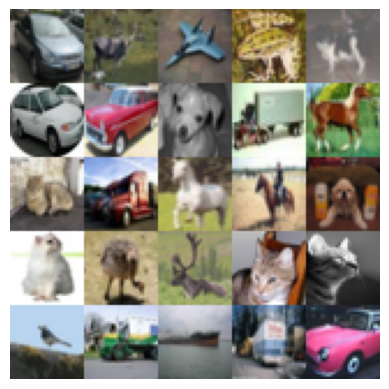

In [ ]:
""" Visualizing the images in our dataset """
# Function that displays cifar images
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im)
    plt.show()

# Displaying some pictures
display_cifar(X_train, 5)

In [ ]:
""" In this section we are going to apply convolutional neural networks in detecting objects and classifying their names """
# Building a convolutional neural network without tuning hyperparameters
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1, batch_size=100, validation_data=(X_test, y_test))

500/500 ━━━━━━━━━━━━━━━━━━━━ 106s 208ms/step - accuracy: 0.3471 - loss: 1.7949 - val_accuracy: 0.5861 - val_loss: 1.1585


**Discuss**
- What is the importance of Max Pooling?
- What is categorical cross-entropy loss?

In [ ]:
# Saving the model
model.save('model.h5')

# Reloading the saved model
reloaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
''' Receiving user input and classifying the image'''

from PIL import Image

# Receiving an Image and predicting the label (complete this function)
def user_image(image_path):

    # Load the image using PIL

    # Resize the image to 32x32

    # Reshape the image from (32, 32, 3) to (1, 32, 32, 3)
    # Hint: Start by converting the image to a numpy array, then reshape the array

    # Predict the category of the image from the reloaded model
    prediction = None


    obj = np.argmax(prediction, axis=None, out=None)
    if obj == 0:
        print("The object is predicted as an aeroplane")
    elif obj == 1:
        print("The object is predicted as an automobile")
    elif obj == 2:
        print("The object is predicted as a bird")
    elif obj == 3:
        print("The object is predicted as a cat")
    elif obj == 4:
        print("The object is predicted as a deer")
    elif obj == 5:
        print("The object is predicted as a dog")
    elif obj == 6:
        print("The object is predicted as a frog")
    elif obj == 7:
        print("The object is predicted as a horse")
    elif obj == 8:
        print("The object is predicted as a ship")
    elif obj == 9:
        print("The object is predicted as a truck")

In [ ]:
# Upload a sample image from the 10 categories and pass it to your function for testing
# user_image("/content/horse.webp")